In [1]:
from keras.models import load_model
# Import all packages

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import sys
from keras.preprocessing.image import img_to_array
import tensorflow as tf
import pickle
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

Using TensorFlow backend.


In [2]:
import math

def font_size_calculator(img_shape):
    font_size = math.ceil(img_shape[0] / 800)
    return font_size

def font_width_calculator(img_shape):
    font_width = math.ceil(img_shape[0] / 400)
    return font_width

def calculate_text_position(img_shape):
    x = math.ceil(img_shape[1] / 40) 
    y = math.ceil(img_shape[0] / 40) + math.ceil(img_shape[0] / 100)
    return x,y

In [11]:
project_path = "/home/mate/develop/PycharmProjects/GeFace/"

# load the trained convolutional neural network from disk, followed
# by the category and color label binarizers, respectively
print("[INFO] loading network...")
model = load_model(project_path  + "faces_model/last/xception_regression_age_fine.hdf5", custom_objects={"tf": tf})
agesLB = pickle.loads(open(project_path + "faces_model/last/regression.label", "rb").read())


[INFO] loading network...


/home/mate/.virtualenvs/deeplearn_gpu/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [55]:
# load the image
image_name = project_path + "faces_colored/00/nm0000100_rm616798464_1955-1-6_2003.jpg"
image = cv2.imread(image_name)
# image = cv2.GaussianBlur(image, (11,11), 1)
# image = cv2.equalizeHist(image)
#image = cv2.imread(project_path+"faces_colored/01/nm0000001_rm124825600_1899-5-10_1968.jpg")
# image = cv2.imread("/home/mate/Pictures/dorka1.jpg")
face_cascade = cv2.CascadeClassifier(project_path + 'detector/haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

In [56]:
bb = []
roi = []
i = 0
output = image.copy()
for (x,y,w,h) in faces:
    bb.append([w * h, i])
    #cv2.rectangle(output,(x,y),(x+w,y+h),(255,0,0),2)
 #   roi_gray = gray[y:y+h, x:x+w]
    roi.append([x,y,w,h])
    i += 1
    print(i)
m = 0
for j in range(i):
    if bb[j][0] > m:
        m = bb[j][0]
        (x,y,w,h) = roi[bb[j][1]]
border_width = font_width_calculator(image.shape)
cv2.rectangle(output,(x,y),(x+w,y+h),(0,0,255),border_width)
roi_color = image[y:y+h, x:x+w]
# pre-process the image for classification
roi_color = cv2.resize(roi_color, (96, 96))
roi_color = roi_color.astype("float") / 255.0*2.0-1
roi_color = img_to_array(roi_color)
roi_color = np.expand_dims(roi_color, axis=0)

1


In [57]:
# classify the input image using Keras' multi-output functionality
print("[INFO] classifying image...")
(agesProba ) = model.predict(roi_color)

[INFO] classifying image...


In [58]:
agesLabel = agesLB.inverse_transform(agesProba[0])
genderLabel = agesProba[1]

In [59]:
genderLabel[0]

array([0.8718174 , 0.12818253], dtype=float32)

In [60]:
if np.argmax(genderLabel) == 1:
    gendertext = "female"
else:
    gendertext = "male"

male
1
3 4
[INFO] age: (48)


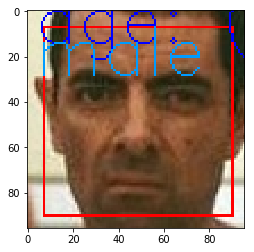

In [61]:
# draw the category label and color label on the image
agesText = "age: ({:.0f})".format(float(agesLabel))
print(gendertext)
fontsize = font_size_calculator(image.shape)
fontwidth = font_width_calculator(image.shape)
print(fontsize)
x_pos, y_pos = calculate_text_position(image.shape)
print(x_pos, y_pos)
cv2.putText(output, agesText, (x_pos, y_pos+10), cv2.FONT_HERSHEY_SIMPLEX,
	fontsize, (255, 0, 0), fontwidth)
cv2.putText(output, gendertext, (x_pos, y_pos*2+20), cv2.FONT_HERSHEY_SIMPLEX,
	fontsize, (255, 155, 0), fontwidth)
# display the predictions to the terminal as well
print("[INFO] {}".format(agesText))
# show the probabilities for each of the individual labels
cv2.imwrite(image_name + "_class_fine.jpg",output)
outp = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
# show the output image
# print("[INFO] {} years old".format(label))
plt.imshow(outp,)

In [54]:
output.shape

(480, 640, 3)